In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from state_cleaner import *
from datetime import datetime
import requests
import json

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
os.chdir('../..')
os.chdir('CovidMobile')
os.getcwd()

'C:\\Users\\Noah\\CovidMobile'

# Census Data

In [3]:
df_col_headers = pd.read_csv('data/DataDict.txt_2020-04-21', sep='\t', header=None)
df_county_data = pd.read_csv('data/DataSet.txt_2020-04-21', sep=',')
df_county_names = pd.read_csv('data/FIPS_CountyName.txt_2020-04-21', sep='delimiter', header=None)

C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df_county_names.tail()

,0
3190,"56037 Sweetwater County, WY"
3191,"56039 Teton County, WY"
3192,"56041 Uinta County, WY"
3193,"56043 Washakie County, WY"
3194,"56045 Weston County, WY"


In [5]:
df_county_names = df_county_names[0].str.split(' ',n=1,expand=True)
df_county_names = pd.concat([df_county_names[0],df_county_names[1].str.split(',',n=1,expand=True)],axis=1)
df_county_names.columns = ['FIPS','County','State']
df_county_names['State'] = df_county_names['State'].str.replace(' ', '')
df_county_names.shape,df_county_names.head()

((3195, 3),     FIPS          County State
 0  00000   UNITED STATES  None
 1  01000         ALABAMA  None
 2  01001  Autauga County    AL
 3  01003  Baldwin County    AL
 4  01005  Barbour County    AL)

In [6]:
df_col_headers = df_col_headers[0].str.split(' ',n=1,expand=True)
df_col_headers = pd.concat([df_col_headers[0],df_col_headers[1].str.split('\s+\s+',n=1,expand=True)],axis=1)
df_col_headers.columns = ['code','var_name','extra']
df_col_headers.drop([0],inplace=True)
df_col_headers.head()



,code,var_name,extra
1,STATECOU,FIPS State and County code,None
2,PST045214,"Population, 2014 estimate",ABS 0 318857056 86 318857056 CENSUS
3,PST045213,"Population, 2013 estimate",ABS 0 316497531 89 316497531 CENSUS
4,PST040210,"Population, 2010 (April 1) estimates base",ABS 0 308758105 82 308758105 CENSUS
5,PST120214,"Population, percent change - April 1, 2010 to ...",PCT 1 3.3 -17.0 72.9 CENSUS


In [7]:
df_county_data.columns = df_col_headers['var_name'].values

In [8]:
df_county_data.head()

,FIPS State and County code,"Population, 2014 estimate","Population, 2013 estimate","Population, 2010 (April 1) estimates base","Population, percent change - April 1, 2010 to July 1, 2014","Population, percent change - April 1, 2010 to July 1, 2013","Population, 2010","Persons under 5 years, percent, 2013","Persons under 18 years, percent, 2013","Persons 65 years and over, percent, 2013",...,"Hispanic-owned firms, percent, 2007","Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010"
0,0,318857056,316497531,308758105,3.3,2.5,308745538,6.3,23.3,14.1,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,4849377,4833996,4780127,1.4,1.1,4779736,6.1,23.0,14.9,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,55395,55136,54571,1.5,1.0,54571,6.1,25.4,13.5,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,200111,195443,182265,9.8,7.2,182265,5.7,22.4,18.1,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,26887,26978,27457,-2.1,-1.7,27457,5.8,21.1,15.9,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


# Build Dataset

In [9]:
os.getcwd()

'C:\\Users\\Noah\\CovidMobile'

In [10]:
full = pd.read_csv('data/Global_Mobility_Report.csv')
full['source'] = 'google'

full.rename(columns={'transit_stations_percent_change_from_baseline':'transit',
                 'residential_percent_change_from_baseline':'homes',
                 'grocery_and_pharmacy_percent_change_from_baseline':'food_drugs',
                'retail_and_recreation_percent_change_from_baseline':'retail',
                'workplaces_percent_change_from_baseline':'work',
                'parks_percent_change_from_baseline':'park'},inplace=True)


C:\Users\Noah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
full.columns.values

array(['country_region_code', 'country_region', 'sub_region_1',
       'sub_region_2', 'date', 'retail', 'food_drugs', 'park', 'transit',
       'work', 'homes', 'source'], dtype=object)

In [12]:
full = full[full['country_region_code']=='US'].rename(columns={'sub_region_1':'state','sub_region_2':'county'}) 

In [13]:
full['state_abb'] = full['state'].apply(replace_acronym)
full['county'] = np.where(full['county'].isnull(),full['state_abb'] ,full['county'] )

In [14]:
df_county_names['Region'] = np.where(df_county_names['State'].isnull(),np.nan,df_county_names['County'])
df_county_names['State'] = df_county_names['State'].fillna(method='backfill')
df_county_names['Region'] = np.where(df_county_names['Region'].isnull(),df_county_names['State'],df_county_names['Region'])
print(df_county_names.head())
df_county_names.drop([0],inplace=True)
df_county_names.rename(columns={'State':'state_abb','Region':'county'},inplace=True)

    FIPS          County State          Region
0  00000   UNITED STATES    AL              AL
1  01000         ALABAMA    AL              AL
2  01001  Autauga County    AL  Autauga County
3  01003  Baldwin County    AL  Baldwin County
4  01005  Barbour County    AL  Barbour County


In [15]:
replc_county = {'Anchorage' :'Anchorage Municipality',
'Bethel' :'Bethel Census Area',
'Fairbanks North Star' :'Fairbanks North Star Borough',
'Juneau' : 'Juneau City and Borough',
'Kenai Peninsula Borough' :'Kenai Peninsula Borough',
'Ketchikan Gateway' :'Ketchikan Gateway Borough',
'Kodiak Island':'Kodiak Island Borough',
'Matanuska-Susitna':'Matanuska-Susitna Borough',
'North Slope':'North Slope Borough',
'Sitka':'Sitka City and Borough',
'Southeast Fairbanks':'Southeast Fairbanks Census Area',
'Valdez-Cordova':'Valdez-Cordova Census Area',
'Doña Ana County':'Doa Ana'}

In [16]:
df_county_data.rename(columns={' FIPS State and County code':'FIPS'},inplace=True)
df_county_data['FIPS'] = df_county_data['FIPS'].astype(float)
df_county_names['county'] = df_county_names['county'].str.replace(' city','')
full['county'] = full['county'].replace(replc_county)
full_tog = full.merge(df_county_names[['FIPS','state_abb','county']],on=['state_abb','county'],how='left',indicator=True)
full_tog['FIPS'] = full_tog['FIPS'].astype(float)
#dropping old census data
#full_tog = full_tog.merge(df_county_data,on=['FIPS'],how='left',indicator=True)

In [17]:
df_county_names[df_county_names['county']=='NM']['county'].value_counts()

NM    1
Name: county, dtype: int64

In [18]:
print(full_tog['_merge'].value_counts())
full_tog.drop(columns=['_merge'],inplace=True)

both          223921
left_only        166
right_only         0
Name: _merge, dtype: int64


In [19]:
full_tog.date = pd.to_datetime(full_tog.date,errors='coerce') 
full_tog['geo']=np.where(full_tog['county']==full_tog['state_abb'],'state','county')

# USDA

In [20]:
files = ["Education.csv",
"PopulationEstimates.csv",
"PovertyEstimates.csv",
"Unemployment.csv"]

for i,f in enumerate(files):
    df =pd.read_csv('data/{}'.format(f))
    print(df.columns[0])
    df.rename(columns={df.columns[0]:'FIPS'},inplace=True)
    if i ==0:
        usda = df.copy()
        continue
    else:
        usda = usda.merge(df,on=['FIPS'])

FIPS Code
FIPStxt
FIPStxt
FIPStxt


In [21]:
usda = pd.concat([usda['FIPS'],usda.filter(like='2018')],axis=1)

In [22]:
full_tog = full_tog.merge(usda,on='FIPS',how='left') 

#### Second CSV File

In [23]:
usda_full = pd.read_excel('./data/food_env_atlas_usda.xls', sheet_name = None)
sheet_names = usda_full.keys()
sheets2keep = ['ACCESS','STORES','RESTAURANTS','ASSISTANCE','INSECURITY']

usda2 = usda_full['Supplemental Data - County']
usda2.rename(columns={'FIPS ': 'FIPS'},inplace=True)
#convert populations from string to numbers:
for col in usda2.iloc[:,3:]:
    usda2[col] = [int(x.replace(',' , '')) for x in usda2[col]]

#add other helpful data
for sheet_name in sheets2keep:
    print(sheet_name)
    usda2 = pd.merge(usda2, usda_full[sheet_name], on = 'FIPS', how = 'left')

ACCESS
STORES
RESTAURANTS
ASSISTANCE
INSECURITY


In [24]:
#get rid of duplicate State and County data:
usda2.iloc[:,~usda2.columns.duplicated()]

#export to cleaned csv:
usda2.to_csv('./data/clean_usda2.csv')

# Neighboring Counties

In [25]:
def keep_one(tup):
    col = tup[1]
    if col == '':
        col = tup[0]
    return col

In [26]:
neighbors = pd.read_csv('data/county_adjacency.csv')


neighbors['count'] = neighbors.groupby(['FIPS','county']).cumcount()
neighbors =neighbors.pivot(index='FIPS',columns='count',values='nearby_FIPS')
neighbors =neighbors.reset_index()
print(neighbors.head())
neighbors.columns = ['FIPS', 'neighbors1', 'neighbors2', 'neighbors3', 'neighbors4', 'neighbors5', 'neighbors6', 'neighbors7', 'neighbors8', 'neighbors9', 'neighbors10', 'neighbors11', 'neighbors12','neighbors13','neighbors14', 'neighbors15']

count    FIPS       0       1       2       3       4       5        6  \
0      1001.0  1001.0  1021.0  1047.0  1051.0  1085.0  1101.0      NaN   
1      1003.0  1003.0  1025.0  1053.0  1097.0  1099.0  1129.0  12033.0   
2      1005.0  1005.0  1011.0  1045.0  1067.0  1109.0  1113.0  13061.0   
3      1007.0  1007.0  1021.0  1065.0  1073.0  1105.0  1117.0   1125.0   
4      1009.0  1009.0  1043.0  1055.0  1073.0  1095.0  1115.0   1127.0   

count        7        8   9  10  11  12  13  14  
0          NaN      NaN NaN NaN NaN NaN NaN NaN  
1          NaN      NaN NaN NaN NaN NaN NaN NaN  
2      13239.0  13259.0 NaN NaN NaN NaN NaN NaN  
3          NaN      NaN NaN NaN NaN NaN NaN NaN  
4          NaN      NaN NaN NaN NaN NaN NaN NaN  


In [27]:
full_tog = full_tog.merge(neighbors, on=['FIPS'],how='left')

# State Orders

In [28]:
orders = pd.read_csv('data/emergency_orders.csv')

orders['soe'] = pd.to_datetime('2020 '  + orders['State of emergency declared'], format='%Y %B %d')
orders['sah'] = pd.to_datetime('2020 '  + orders['Stay at home ordered'], format='%Y %B %d',errors='coerce')
orders['school_year'] = np.where(orders['Schools']=='Yes (remainder of term)',1,0)
orders['bars'] = orders['Bars & sit-down restaurants'].replace({'Yes':1,'Restricted':1,'No':0})
orders['gather'] = np.where(orders['Gatherings banned'].str.contains('All'),1,0)
orders['daycares'] =  orders['Daycares'].replace({'Yes':1,'Restricted':1,'No':0})
orders['non_essential_retail'] =  orders['Non-essential retail'].replace({'Yes':1,'Restricted':1,'No':0,'Regional':0})
orders['travel_restriction'] = orders['Out-of-state travel restrictions'].copy()
orders['state_abb'] = orders['State/territory'].str.replace(' ','',1).apply(replace_acronym)
orders[orders['state_abb'].isnull()]['State/territory']

37      N. Mariana Islands
49     U.S. Virgin Islands
Name: State/territory, dtype: object

In [29]:
cols = ['soe','sah','state_abb','school_year','bars','gather','Gatherings banned','daycares','non_essential_retail','travel_restriction']

In [30]:
full_tog = full_tog.merge(orders[cols],on=['state_abb'],how='left')

# State Closures

In [31]:
actions = {'State Is Easing Social Distancing Measures':'state_ease',
           'Stay At Home':'state_sah',
           'Mandatory Quarantine|Mandatory Quarantine for Travelers':'state_mandate',
           'non-essential|Non-Essential Business Closures':'state_non_ess',
           'Large Gatherings Ban|Large Gathering Ban (announced 4/28)|Large Gatherings':'state_lgb',
           'School Closures|School Closure':'state_sc',
           'Bar/Restaurant Limits|Bar/Restaurant':'state_bar_res',
           'Primary Election Postponement':'state_election',
           'Public Health Emergency|Emergency Declaration|Disaster Proclamation|Peacetime Emergency|Proclamation of Disaster Emergency|Proclamation of Civil Emergency':'state_emergency',
          'Executive Order mandating compliance with state guidance':'state_compliance',
           'Preparedness Proclamation':'state_prepare'}

In [32]:

close= pd.read_csv("data/closure_dates.csv")
print(close)
close.drop(['Unnamed: 0'],axis=1,inplace=True)
for x in actions.keys():
    close[x] = np.where(close['Description'].str.lower().str.contains(x.lower()),1,0)
close.drop_duplicates(inplace=True)
    #close['chk'] = close.iloc[:,5:].sum(axis=1)
#close.sort_values(by=['chk']).drop_duplicates(subset=['Description']).to_csv('chk.csv')


close['first_date'] = close['Date'].str.split(',',expand=True).iloc[:,0]
close['first_date'] = pd.to_datetime(close['first_date']+'/2020',errors='coerce')
close.rename(columns=actions,inplace=True)
close.rename(columns={'Easing':'ease'},inplace=True)

for i in actions:
    x = actions[i]
    close[x] = np.where(close[x]==1,close['first_date'],np.datetime64('today'))
lst  = [actions[x] for x in actions]

close = close[['State']+lst+['ease']].copy()
start = close[close['ease']==0].copy()
ease = close[close['ease']==1].copy()
fin =pd.DataFrame()
for i,y in enumerate([start,ease]):
    for x in lst:
        fin = pd.concat([fin,y.groupby(['State'])[x].min()],axis=1)
        fin.rename(columns={x:'{}_{}'.format(x,i)},inplace=True)
upps = {x.upper():us_state_abbrev[x] for x in us_state_abbrev.keys()}

def rep(x):
    return upps[x]
fin = fin.reset_index() 
fin['State'] = fin['index'].map(rep)
fin.drop(['index'],axis=1,inplace=True)
full_tog = full_tog.merge(fin,left_on=['state_abb'], right_on=['State'],how='left')

     Unnamed: 0                                Date  \
0             0                           3/13, 5/8   
1             1  3/17, 3/19, 3/20, 3/26, 3/27, 4/28   
2             2                                3/18   
3             3                                3/23   
4             4                           3/27, 4/3   
..          ...                                 ...   
436         436                                3/13   
437         437               3/19, 3/27, 4/3, 4/28   
438         438               3/20, 3/27, 4/3, 4/28   
439         439                                3/27   
440         440                           4/3, 4/29   

                                           Description  Easing    State  
0                            Public Health Emergency:      0.0  ALABAMA  
1    School Closures, Large Gatherings Ban, Bar/Res...     0.0  ALABAMA  
2                      Primary Election Postponement:      0.0  ALABAMA  
3                                Section 11

C:\Users\Noah\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


# Covid Data (source: NYT)

In [34]:
lst_download = '2020-05-14'

In [35]:
covid_county = pd.read_csv('data/{}_us-counties.csv'.format(lst_download),encoding = "ISO-8859-1")
covid_state = pd.read_csv('data/{}_us-states.csv'.format(lst_download),encoding = "ISO-8859-1")

In [36]:
covid_state['state_abb'] = covid_state['state'].apply(replace_acronym)
covid_state['county'] = covid_state['state_abb'].copy()
covid_state['fips'] = covid_state['fips'] *1000.0
covid_county['state_abb'] = covid_county['state'].apply(replace_acronym)
covid = pd.concat([covid_state,covid_county],axis=0)
covid.date = pd.to_datetime(covid.date,errors='coerce')
covid.rename(columns={'fips':'FIPS'},inplace=True)
covid['FIPS'] = covid['FIPS'].astype(float)
print(covid.shape)
covid.dropna(subset=['FIPS'],inplace=True)
covid[covid['date']>=pd.to_datetime('2020-02-15')].shape
covid['first_case_date']  = covid.groupby(['FIPS'])['date'].transform(min)
covid.sort_values(by=['FIPS','date']).head(20) 

(145377, 7)


,date,state,FIPS,cases,deaths,state_abb,county,first_case_date
586,2020-03-13,Alabama,1000.0,6,0,AL,AL,2020-03-13
637,2020-03-14,Alabama,1000.0,12,0,AL,AL,2020-03-13
689,2020-03-15,Alabama,1000.0,23,0,AL,AL,2020-03-13
742,2020-03-16,Alabama,1000.0,29,0,AL,AL,2020-03-13
795,2020-03-17,Alabama,1000.0,39,0,AL,AL,2020-03-13
849,2020-03-18,Alabama,1000.0,51,0,AL,AL,2020-03-13
903,2020-03-19,Alabama,1000.0,78,0,AL,AL,2020-03-13
957,2020-03-20,Alabama,1000.0,106,0,AL,AL,2020-03-13
1011,2020-03-21,Alabama,1000.0,131,0,AL,AL,2020-03-13
1065,2020-03-22,Alabama,1000.0,157,0,AL,AL,2020-03-13


In [37]:
full_data = full_tog.merge(covid,on=['date','FIPS'],how='left',indicator=True)

In [38]:
full_data.geo.value_counts()

county    219937
state       4233
Name: geo, dtype: int64

C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


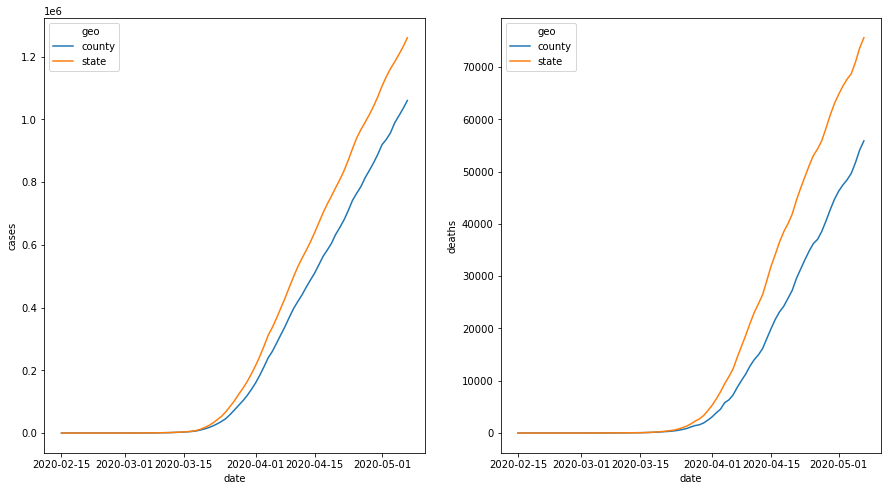

In [39]:
plt_data = full_data.groupby(['geo','date'])['cases','deaths'].sum().reset_index()
f, ax = plt.subplots(1,2,sharex=True,figsize=(15,8))
sns.lineplot(x='date',y='cases',hue='geo',data=plt_data,ax=ax[0])
sns.lineplot(x='date',y='deaths',hue='geo',data=plt_data,ax=ax[1])


In [40]:
full_data.groupby(['geo','date'])['cases','deaths'].sum().reset_index()

C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,geo,date,cases,deaths
0,county,2020-02-15,15.0,0.0
1,county,2020-02-16,15.0,0.0
2,county,2020-02-17,25.0,0.0
3,county,2020-02-18,25.0,0.0
4,county,2020-02-19,25.0,0.0
...,...,...,...,...
161,state,2020-05-03,1161990.0,67665.0
162,state,2020-05-04,1183846.0,68724.0
163,state,2020-05-05,1207504.0,70956.0
164,state,2020-05-06,1231964.0,73664.0


In [41]:
full_data.to_csv('data/compiled_{}.csv'.format(str(datetime.now().date())),index=False)

# Tracking Counties

In [55]:
orders = full_data[['state_x', 'state_abb_x', 'county_x','FIPS', 'soe','sah', 'state_ease_0', 'state_sah_0',
       'state_mandate_0', 'state_non_ess_0', 'state_lgb_0', 'state_sc_0',
       'state_bar_res_0', 'state_election_0', 'state_emergency_0',
       'state_compliance_0', 'state_prepare_0', 'state_ease_1',
       'state_sah_1', 'state_mandate_1', 'state_non_ess_1', 'state_lgb_1',
       'state_sc_1', 'state_bar_res_1', 'state_election_1',
       'state_emergency_1', 'state_compliance_1', 'state_prepare_1']].drop_duplicates()

orders.rename(columns={'state_x':'state', 'state_abb_x':'state_abb', 'county_x':'county'},inplace=True)
orders.to_csv('data/county_tracker.csv', index=False)

# Lag mobility data

In [37]:
full_data.columns.values

array(['country_region_code', 'country_region', 'state_x', 'county_x',
       'date', 'retail', 'food_drugs', 'park', 'transit', 'work', 'homes',
       'source', 'state_abb_x', 'FIPS', 'geo', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'Births_2018', 'Deaths_2018', 'NATURAL_INC_2018',
       'INTERNATIONAL_MIG_2018', 'DOMESTIC_MIG_2018', 'NET_MIG_2018',
       'RESIDUAL_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018',
       'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018',
       'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'POVALL_2018',
       'CI90LBAll_2018', 'CI90UBALL_2018', 'PCTPOVALL_2018',
       'CI90LBALLP_2018', 'CI90UBALLP_2018', 'POV017_2018',
       'CI90LB017_2018', 'CI90UB017_2018', 'PCTPOV017_2018',
       'CI90LB017P_2018', 'CI90UB017P_2018', 'POV517_2018',
       'CI90LB517_2018', 'CI90UB517_2018', 'PCTPOV517_2018',
       'CI90LB517P_2018', 'CI90UB517P_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'POV04_2018', 'CI90LB04_2018',
     

In [58]:
full_data[full_data[['FIPS','date']].duplicated()]['FIPS']

1        NaN
3        NaN
5        NaN
7        NaN
9        NaN
          ..
127485   NaN
127486   NaN
127487   NaN
127488   NaN
127489   NaN
Name: FIPS, Length: 166, dtype: float64

# Weather Data from NOAA

In [3]:
fips_to_county = pd.read_csv('./data/ZIP-COUNTY-FIPS_2017-06.csv')
parks = pd.read_csv('./data/parks_only.csv')

In [4]:
fips_to_county[0:10]

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1
5,36701,Autauga County,AL,1001,H1
6,36091,Autauga County,AL,1001,H1
7,36051,Autauga County,AL,1001,H1
8,36068,Autauga County,AL,1001,H1
9,36008,Autauga County,AL,1001,H1


In [71]:
fips = parks['FIPS'].unique()
len(fips)

956

In [72]:
fips_to_zips = dict()
for fip in fips:
    fips_to_zips[fip] = list(fips_to_county[fips_to_county['STCOUNTYFP']==fip]['ZIP'])

In [73]:
len(fips_to_zips)

956

In [6]:
dc_zips = county_to_zips['District of Columbia']
len(dc_zips)

219

In [7]:
def get_weather(locationid, datasetid, begin_date, end_date, mytoken, base_url):
    token = {'token': mytoken}
    
    #passing as string instead of dict because NOAA API does not like percent encoding
    params = 'datasetid='+str(datasetid)+'&'+'locationid='+str(locationid)+'&'+'startdate='+str(begin_date)+'&'+'enddate='+str(end_date)+'&'+'limit=25'+'&datatypeid=TOBS,PRCP'
    
    r = requests.get(base_url+params, headers=token)
    #print("Request status code: "+str(r.status_code))

    try:
        #results comes in json form. Convert to dataframe
        df = pd.DataFrame.from_dict(r.json()['results'])
        #print("Successfully retrieved "+str(len(df['station'].unique()))+" stations")
        dates = pd.to_datetime(df['date'])

        return df
    except:
        pass

In [65]:
import itertools
z = dict(itertools.islice(fips_to_zips.items(), 5))

In [45]:
import json
import pymongo
import time
from pprint import pprint

conn=pymongo.MongoClient()
db = conn.noaaweather
records = db.records
conn.list_database_names()

['admin', 'config', 'local', 'mydb', 'noaaweather']

In [59]:
records.delete_many({})

In [66]:
baseurl = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?'
mytoken = 'NVPWXeGxislWKqThiizoffNjnPtUtAcT'
databaseid = 'GHCND'
begindate = '2020-03-01'
enddate = '2020-05-01'

tic = time.perf_counter()
weather = pd.DataFrame()
for fip, codes in z.items():
    print(fip)
    fip_weather = pd.DataFrame()
    for code in codes:
        try:
            newdf = get_weather('ZIP:'+str(code), databaseid,begindate,enddate,mytoken,baseurl)
            fip_weather = fip_weather.append(newdf)
        except:
            continue
    #average across the county
    precip = fip_weather[fip_weather['datatype']=='PRCP'][['date','value']].rename(columns={'value':'precipitation'})
    temp = fip_weather[fip_weather['datatype']=='TOBS'][['date','value']].rename(columns={'value':'temp'})
    w = pd.merge(precip, temp, how ='outer', on ='date') 
    avgs = pd.merge(w.groupby('date', as_index=False)['precipitation'].mean(),
                    w.groupby('date', as_index=False)['temp'].mean(),on='date')
    avgs['FIPS']=fip
    avgs = avgs.to_dict()
    
    #insert records into MongoDB
    a = [{key:value[index] for key,value in avgs.items()}
         for index in range(max(map(len,avgs.values())))]
    records.insert_many(a)
    print(records.count())
    
toc= time.perf_counter()
print(f"Run time was {toc - tic:0.4f} seconds")

1001


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


25
1003
62
1005
79
1007
124
1009
153
Run time was 429.0935 seconds
